<a href="https://colab.research.google.com/github/1630940/03/blob/master/prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

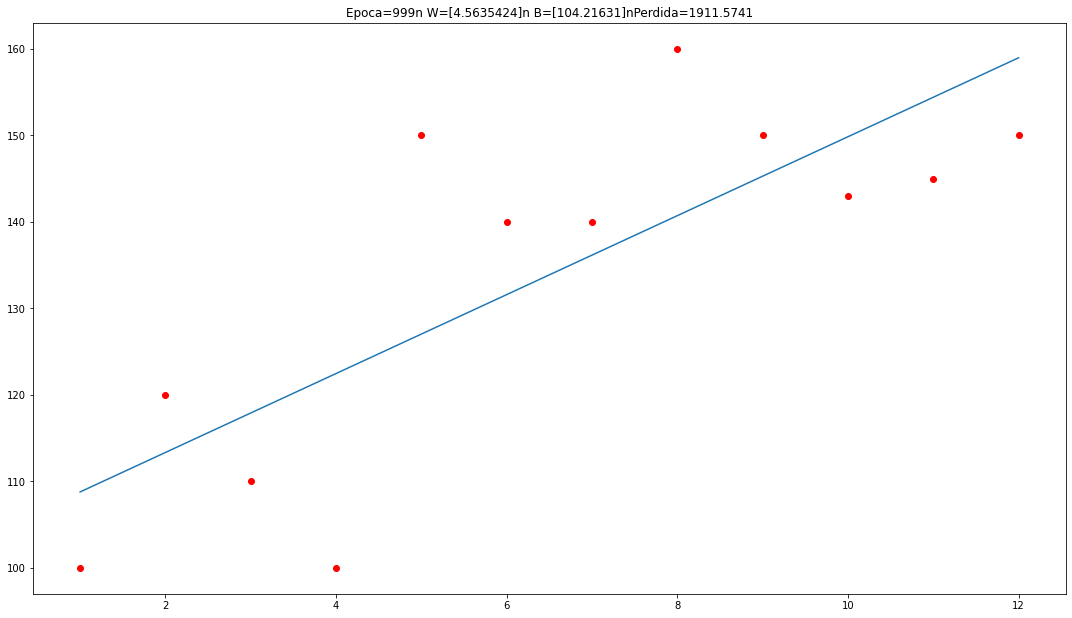

In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

# Declaramos la variable del peso (Weight W) 
# Yo prefiero llamarlo como la inclinacion de la curva
W=tf.Variable([0.01],dtype=tf.float32)
# Declaramos la variable del margen (bias b)
# En otras palabra de aqui para arriba o para abajo
b=tf.Variable([0.01],dtype=tf.float32)
# x son los dias que han transcurriendo
x=tf.placeholder(tf.float32)
# y es la venta de ese dia
y=tf.placeholder(tf.float32)
# Operacion que genera la linea que le llamaremos regresion lineal
regresionLineal=W*x + b
# La taza de aprendisaje es el tamaño de los brincos que hay que dar para encontrar el resultado optimo
tazaDeAprendizaje=0.001
# Estas operaciones lo que hacen es tratar de reducir 
# la perdida de exactitud de la inclinacion por cada venta de cada dia
perdida=tf.reduce_sum(tf.square(regresionLineal-y))
optimizacion = tf.train.GradientDescentOptimizer(tazaDeAprendizaje)
entrenar = optimizacion.minimize(perdida)
# Los dias y las ventas por dia
diasDelMes  =[1  ,2  ,3  ,4  ,5  ,6  ,7  ,8  ,9  ,10 ,11 ,12  ]
ventasPorDia=[100,120,110,100,150,140,140,160,150,143,145,150 ]

# Declaramos la vriable que inicializa las variables
init=tf.global_variables_initializer()
# Inicializamos la sesion
sess=tf.Session()
# Inicializamos las variables
sess.run(init)
#Inicializamos la grafica
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.show()
fig.canvas.draw()
# Hacemos in cliclo de 1000 repeticiones 
# (En TensorFlow a cada repeticion se le conoce como epoca)
for epoca in range(1000):
    fig.clear()
    entrenar_, resPerdida=sess.run([entrenar,perdida],feed_dict={x: diasDelMes,y:ventasPorDia})
    # Obtenemos el resultado de la inclinacion (Weight)
    resW=sess.run(W)
    # Obtenemos el resultado del sesgo (Bias)
    resB=sess.run(b)
    # Pintamos las ventas en la grafica
    plt.plot(diasDelMes,ventasPorDia,'ro',label="datos")
    # Obtenemos la inclinacion de la prediccion en la grafica
    inclinacion=[ resW * x + resB for x in diasDelMes]
    # Pintamos la linea de la prediccion
    plt.plot(diasDelMes,inclinacion,label="ajuste")
    #plt.text(0, 0, 'epoca'+str(epoca))
    plt.title('Epoca='+str(epoca)+'n W='+str(resW)+'n B='+str(resB)+ 'nPerdida='+str(resPerdida))
    if epoca == 0:
        plt.legend()
    fig.canvas.draw()
plt.show()